In [8]:
## Import necessary packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [9]:
## Import data
data = pd.read_excel("hw2-dataset.xlsx")
display(data)
# clean data
data = data[data.prc >= 0]
display(data)

,gvkey,datadate,capxv,dltt,dpc,invt,oancf,oiadp,ppevbb,ppeveb,pstkrv,sppe,naics,sic,prc,shrout
0,1045,1980-12-31,431.335,1271.113,233.521,185.081,NaN,-86.253,3459.592,3275.725,125.000,5.864,481111,4512,9.000000,28698
1,1045,1981-12-31,542.166,1516.426,233.423,186.065,NaN,72.214,3275.725,3781.232,125.000,27.123,481111,4512,11.000000,28766
2,1045,1982-12-31,421.354,1516.609,244.051,193.634,NaN,9.137,3781.232,4167.129,125.000,4.622,481111,4512,24.750000,37241
3,1045,1983-12-31,536.039,1511.541,297.188,192.605,NaN,281.484,4167.141,4555.527,254.350,29.459,481111,4512,36.125000,48374
4,1045,1984-12-31,516.174,1541.406,307.726,197.521,NaN,368.526,4555.512,4626.039,264.038,147.016,481111,4512,36.125000,48453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,28590,1999-12-31,280.474,395.078,180.302,43.979,329.271,108.885,NaN,1580.083,15.000,9.152,561613,7381,22.000000,40861
9140,28590,2000-12-31,214.443,311.418,188.950,0.000,364.756,100.838,NaN,1394.630,10.697,4.063,561613,7381,19.875000,51778
9141,28590,2001-12-31,193.100,252.900,194.400,0.000,315.700,88.000,NaN,1500.000,10.600,2.000,561613,7381,22.100000,54268
9142,28590,2002-12-31,204.200,304.200,154.800,0.000,241.300,146.400,NaN,1714.100,0.000,48.000,561613,7381,18.480000,54253


,gvkey,datadate,capxv,dltt,dpc,invt,oancf,oiadp,ppevbb,ppeveb,pstkrv,sppe,naics,sic,prc,shrout
0,1045,1980-12-31,431.335,1271.113,233.521,185.081,NaN,-86.253,3459.592,3275.725,125.000,5.864,481111,4512,9.000000,28698
1,1045,1981-12-31,542.166,1516.426,233.423,186.065,NaN,72.214,3275.725,3781.232,125.000,27.123,481111,4512,11.000000,28766
2,1045,1982-12-31,421.354,1516.609,244.051,193.634,NaN,9.137,3781.232,4167.129,125.000,4.622,481111,4512,24.750000,37241
3,1045,1983-12-31,536.039,1511.541,297.188,192.605,NaN,281.484,4167.141,4555.527,254.350,29.459,481111,4512,36.125000,48374
4,1045,1984-12-31,516.174,1541.406,307.726,197.521,NaN,368.526,4555.512,4626.039,264.038,147.016,481111,4512,36.125000,48453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,28590,1999-12-31,280.474,395.078,180.302,43.979,329.271,108.885,NaN,1580.083,15.000,9.152,561613,7381,22.000000,40861
9140,28590,2000-12-31,214.443,311.418,188.950,0.000,364.756,100.838,NaN,1394.630,10.697,4.063,561613,7381,19.875000,51778
9141,28590,2001-12-31,193.100,252.900,194.400,0.000,315.700,88.000,NaN,1500.000,10.600,2.000,561613,7381,22.100000,54268
9142,28590,2002-12-31,204.200,304.200,154.800,0.000,241.300,146.400,NaN,1714.100,0.000,48.000,561613,7381,18.480000,54253


In [10]:
### Create variables
data["year"] = data.datadate.dt.year
data["equity"] = data.prc * data.shrout
data["assets"] = data.equity + 1000 * data.dltt
data["leverage"] = data.dltt * 1000 / data.assets
display(data)

,gvkey,datadate,capxv,dltt,dpc,invt,oancf,oiadp,ppevbb,ppeveb,pstkrv,sppe,naics,sic,prc,shrout,year,equity,assets,leverage
0,1045,1980-12-31,431.335,1271.113,233.521,185.081,NaN,-86.253,3459.592,3275.725,125.000,5.864,481111,4512,9.000000,28698,1980,2.582820e+05,1.529395e+06,0.831121
1,1045,1981-12-31,542.166,1516.426,233.423,186.065,NaN,72.214,3275.725,3781.232,125.000,27.123,481111,4512,11.000000,28766,1981,3.164260e+05,1.832852e+06,0.827359
2,1045,1982-12-31,421.354,1516.609,244.051,193.634,NaN,9.137,3781.232,4167.129,125.000,4.622,481111,4512,24.750000,37241,1982,9.217148e+05,2.438324e+06,0.621988
3,1045,1983-12-31,536.039,1511.541,297.188,192.605,NaN,281.484,4167.141,4555.527,254.350,29.459,481111,4512,36.125000,48374,1983,1.747511e+06,3.259052e+06,0.463798
4,1045,1984-12-31,516.174,1541.406,307.726,197.521,NaN,368.526,4555.512,4626.039,264.038,147.016,481111,4512,36.125000,48453,1984,1.750365e+06,3.291771e+06,0.468260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,28590,1999-12-31,280.474,395.078,180.302,43.979,329.271,108.885,NaN,1580.083,15.000,9.152,561613,7381,22.000000,40861,1999,8.989420e+05,1.294020e+06,0.305311
9140,28590,2000-12-31,214.443,311.418,188.950,0.000,364.756,100.838,NaN,1394.630,10.697,4.063,561613,7381,19.875000,51778,2000,1.029088e+06,1.340506e+06,0.232314
9141,28590,2001-12-31,193.100,252.900,194.400,0.000,315.700,88.000,NaN,1500.000,10.600,2.000,561613,7381,22.100000,54268,2001,1.199323e+06,1.452223e+06,0.174147
9142,28590,2002-12-31,204.200,304.200,154.800,0.000,241.300,146.400,NaN,1714.100,0.000,48.000,561613,7381,18.480000,54253,2002,1.002595e+06,1.306795e+06,0.232783


There are 381 unique companies in the dataset.
On average, there are 22.753280839895012 observation per company.


10      0.520514
34      0.787437
58      0.246532
82      0.276494
106     0.549909
          ...   
9034    0.196328
9058    0.224666
9082    0.284163
9106    0.058527
9130    0.134431
Name: leverage, Length: 369, dtype: float64

<Axes: >

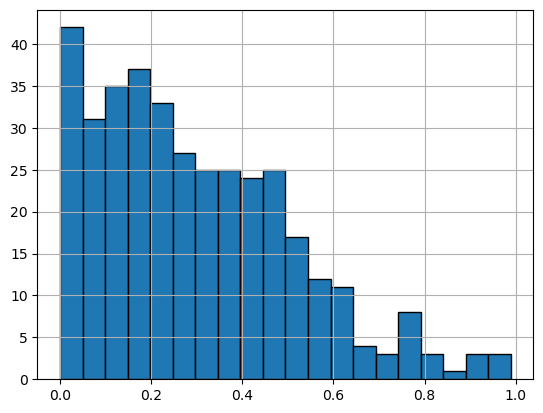

In [15]:
### Sample questions
companies = data.gvkey.unique()
print("There are " + str(len(companies)) + " unique companies in the dataset.")
print("On average, there are " + str(data.gvkey.value_counts().mean())+ " observation per company.")
lev1990 = data[data.year == 1990].leverage
display(lev1990)
lev1990.hist(edgecolor='black', bins = 20)

In [23]:
### Regression estimates, interpretation, and standard errors. Report R-squared.
# hypothesis: leverage = constant + beta1 * log(capxv) + beta2 * log(oiadp) + controls
# esimate model using ordinary least squares using heteroskedasticity robust standard errors

# clean data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
clean_data = data.dropna()
clean_data = clean_data[clean_data.capxv > 0]
clean_data = clean_data[clean_data.oiadp > 0]


# (1) No controls
model1 = smf.ols(formula='leverage ~ np.log(capxv) + np.log(oiadp)', data=clean_data).fit(cov_type='HC3')

print("(1) No controls:")
print("log(Capital Expenditure): beta = " + str(model1.params['np.log(capxv)']) + ", standard error = " + str(model1.bse['np.log(capxv)']))
print("log(Operating Income): beta = " + str(model1.params['np.log(oiadp)']) + ", standard error = " + str(model1.bse['np.log(oiadp)']))
print("As operating income increasese by 1%, leverage will increase by 0.0697")
print("As capital expenditure increasese by 1%, leverage will decrease by 0.0523")
print("R-squared = " + str(model1.rsquared) + "\n")


# (2) Control variables: Year fixed effects
model2 = smf.ols(formula='leverage ~ np.log(capxv) + np.log(oiadp) + C(year)', data=clean_data).fit(cov_type='HC3')

print("(2) Year fixed effects:")
print("log(Capital Expenditure): beta = " + str(model2.params['np.log(capxv)']) + ", standard error = " + str(model2.bse['np.log(capxv)']))
print("log(Operating Income): beta = " + str(model2.params['np.log(oiadp)']) + ", standard error = " + str(model2.bse['np.log(oiadp)']))
print("As operating income increasese by 1%, leverage will increase by 0.0692")
print("As capital expenditure increasese by 1%, leverage will decrease by 0.0542")
print("R-squared = " + str(model2.rsquared) + "\n")


# (3) Conrtol variables: Company fixed effects
model3 = smf.ols(formula='leverage ~ np.log(capxv) + np.log(oiadp) + C(gvkey)', data=clean_data).fit(cov_type='HC3')

print("(3) Company fixed effects:")
print("log(Capital Expenditure): beta = " + str(model3.params['np.log(capxv)']) + ", standard error = " + str(model3.bse['np.log(capxv)']))
print("log(Operating Income): beta = " + str(model3.params['np.log(oiadp)']) + ", standard error = " + str(model3.bse['np.log(oiadp)']))
print("As operating income increasese by 1%, leverage will increase by 0.0219")
print("As capital expenditure increasese by 1%, leverage will decrease by 0.0458")
print("R-squared = " + str(model3.rsquared) + "\n")


# (4) Control variables: Company and Year fixed effects
model4 = smf.ols(formula='leverage ~ np.log(capxv) + np.log(oiadp) + C(gvkey) + C(year)', data=clean_data).fit(cov_type='HC3')

print("(4) Company and Year fixed effects:")
print("log(Capital Expenditure): beta = " + str(model4.params['np.log(capxv)']) + ", standard error = " + str(model4.bse['np.log(capxv)']))
print("log(Operating Income): beta = " + str(model4.params['np.log(oiadp)']) + ", standard error = " + str(model4.bse['np.log(oiadp)']))
print("As operating income increasese by 1%, leverage will increase by 0.0213")
print("As capital expenditure increasese by 1%, leverage will decrease by 0.0460")
print("R-squared = " + str(model4.rsquared) + "\n")


(1) No controls:
log(Capital Expenditure): beta = 0.06965736022250486, standard error = 0.006296678495030593
log(Operating Income): beta = -0.052286549642375516, standard error = 0.005977215165638035
As operating income increasese by 1%, leverage will increase by 0.0697
As capital expenditure increasese by 1%, leverage will decrease by 0.0523
R-squared = 0.06871825558022016

(2) Year fixed effects:
log(Capital Expenditure): beta = 0.06922232566307777, standard error = 0.0063249502469068086
log(Operating Income): beta = -0.05416537163385945, standard error = 0.00596567746900749
As operating income increasese by 1%, leverage will increase by 0.0692
As capital expenditure increasese by 1%, leverage will decrease by 0.0542
R-squared = 0.12293971538306292

(3) Company fixed effects:
log(Capital Expenditure): beta = 0.02191337363836565, standard error = 0.0058434360419287144
log(Operating Income): beta = -0.04583822273339976, standard error = 0.006507427153427375
As operating income increase

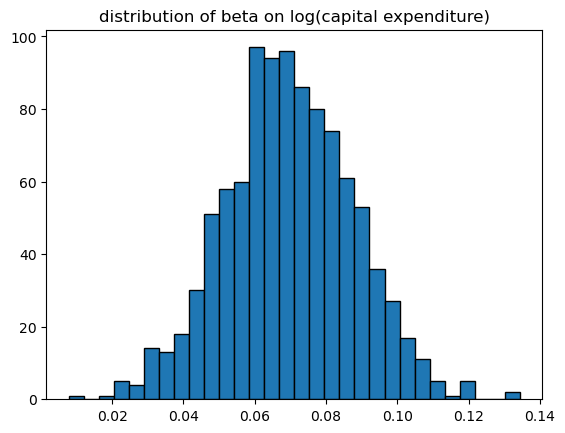

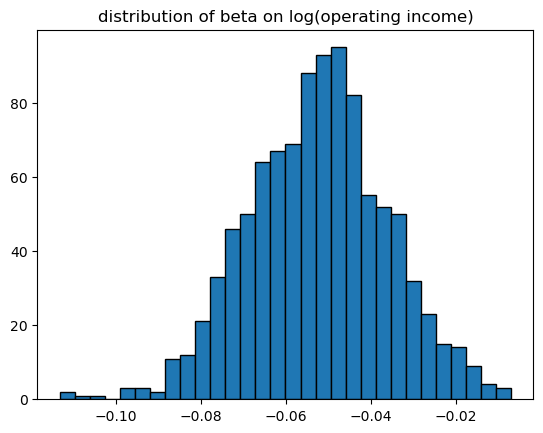

Standard Deviation log(capital expenditure): 0.017989781987698603
Standard Deviation log(operating income): 0.016307796795939362
these standard deveations are pretty different from the ones from part 5


In [20]:
## 1000 Random samples and 1000 regression results (100 companies in each sample). Plot distribution of each beta coefficient.
## Compare standard deviation of each distribution to standard error of regression (4) from the previous part.

n_sample = 1000
n_company = 100
beta1 = []
beta2 = []

for i in range(0, n_sample):
    companies = np.random.choice(clean_data.gvkey.unique(), n_company, replace=False)

    company_data = clean_data[clean_data.gvkey.isin(companies)]

    model = smf.ols(formula='leverage ~ np.log(capxv) + np.log(oiadp)', data=company_data).fit(cov_type='HC3')
    
    beta1.append(model.params['np.log(capxv)'])
    beta2.append(model.params['np.log(oiadp)'])

plt.hist(beta1, bins = 30, edgecolor = "black")
plt.title("distribution of beta on log(capital expenditure)")
plt.show()
plt.hist(beta2, bins = 30, edgecolor = "black")
plt.title("distribution of beta on log(operating income)")
plt.show()

print("Standard Deviation log(capital expenditure): " + str(np.std(beta1)))
print("Standard Deviation log(operating income): " + str(np.std(beta2)))
print("these standard deveations are pretty different from the ones from part 5")